# Actividad

- **Nombre**: Leonardo Mojica Amezquita, Francisco González Moreno, Miranda Magallanes García
- **Matrícula**: A00571960, A00835317, A00832477

# Entregar 
Archivo PDF de la actividad y la liga de la actividad en su repostitorio.

# Nota: 
Todas las tareas entregadas fuera de la fecha limite se califican sobre 50 de los 100 puntos posibles.

# Importante: 
- Colocar nombre en ejes en gráficas
- Nombre en gráficas 
- Conclusiones con el nombre de cada alumno
- Contestar cada pregunta


#**Presion Arterial**

In [ ]:
# Si trabajamos en Google Colaboratory corremos las siguientes lineas de código
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Nos cambiamos a la carpeta donde tengamos el repositorio
%cd '/content/drive/MyDrive/SemanaTec/arte-analitica'


/content/drive/MyDrive/SemanaTec/arte-analitica


1. Carga los datos del archivo **presion.csv**

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

import pandas as pd

sns.set()

In [ ]:
pres = pd.read_csv('data/presion.csv')
pres.head()

,edad,Average of ap_hi,Average of ap_lo
0,30,112.500000,72.500000
1,39,119.029340,88.229829
2,40,119.789630,85.858889
3,41,121.490862,90.344648
4,42,120.163872,89.887957


2. Gráfica la información en el eje de las x la edad  y en el eje y la presión ( alta y baja) 


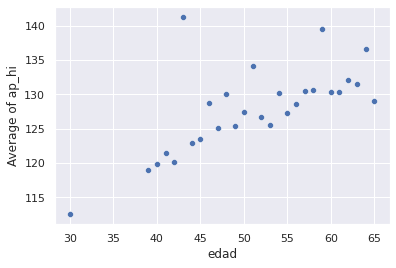

In [ ]:
# alta
sns.scatterplot(data=pres, x='edad',y='Average of ap_hi')


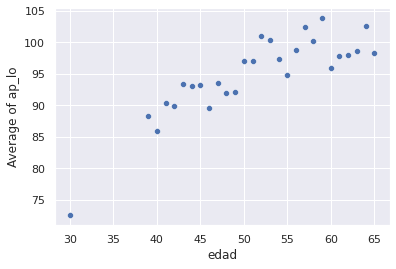

In [ ]:
# baja
sns.scatterplot(data=pres, x='edad',y='Average of ap_lo')


3. Genera una regresión líneal para obtener una aproximación de la ecuación 
$$
y = ax + b
$$
donde $ a $ se conoce comúnmente como **pendiente**, y $ b $ se conoce comúnmente como **intersección**.

¿Cuál es el valor de a y cuál es el valor de b para la presión alta y baja?

In [ ]:
from sklearn.linear_model import LinearRegression

b:  103.3969740964366
a:  [0.47769703]


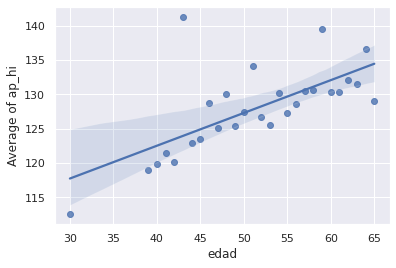

In [ ]:
#alta
lm1 = LinearRegression()
lm1.fit(pres[['edad']], pres['Average of ap_hi'])
print('b: ', lm1.intercept_)
print('a: ', lm1.coef_)
sns.regplot(data=pres, x='edad',y='Average of ap_hi')

b:  63.726200409422745
a:  [0.60898106]


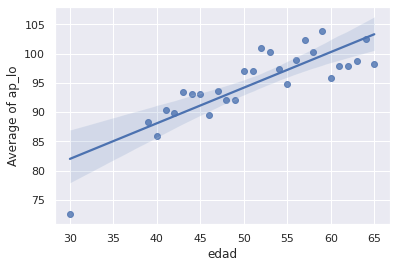

In [ ]:
# baja
lm1 = LinearRegression()
lm1.fit(pres[['edad']], pres['Average of ap_lo'])
print('b: ', lm1.intercept_)
print('a: ', lm1.coef_)
sns.regplot(data=pres, x='edad',y='Average of ap_lo')

4. Gráfica los datos reales vs modelo obtenido. 

Se debe visualizar los datos reales ( azules) 
Recta del modelo ( negra) 
Distancias ( verde ) 

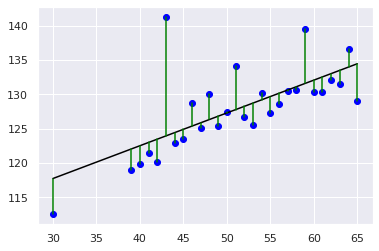

In [ ]:
# alta
x = pres[['edad']]
y = pres['Average of ap_hi']

np.linspace(0, 10, 10)

model = LinearRegression(fit_intercept=True)
model.fit(x, y)

xarr = x['edad']

yfit = model.predict(x)

plt.scatter(x,y, color="blue")
plt.plot(x, yfit, color="black")
plt.plot(np.vstack([xarr,xarr]), np.vstack([y, model.predict(x)]), color="green");

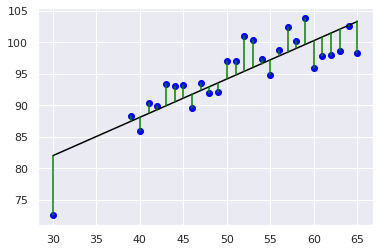

In [ ]:
# baja
x = pres[['edad']]
y = pres['Average of ap_lo']

np.linspace(0, 10, 10)

model = LinearRegression(fit_intercept=True)
model.fit(x, y)

xarr = x['edad']

yfit = model.predict(x)

plt.scatter(x,y, color="blue")
plt.plot(x, yfit, color="black")
plt.plot(np.vstack([xarr,xarr]), np.vstack([y, model.predict(x)]), color="green");

5. ¿Cuál es la presión arterial hi y lo esperada para una persona de 76 años?

Genera una función que calcule lo anterior

In [ ]:
# baja
edad_calcular=76
b = 63.726200409422745
a = 0.60898106

def presionLo(edad):
  return a*edad + b

presionLo(edad_calcular)

110.00876096942275

In [ ]:
# alta
edad_calcular = 76

b = 103.3969740964366
a = 0.47769703

def presionHi(edad):
  return a*edad + b

presionHi(edad_calcular)

139.7019483764366

6. Conclusiones 


 matrícula- Nombre alumno : detalle
 A00571960 - Leonardo Mojica : En esta parte de la actividad podemos observar la presión arteriar baja y alta comparada con la edad, podemos generar la regresión lineal con ambas graficas para poder obtener una ecuación de la recta aproximada, esto para ayudarnos a tener un modelo matematico aproximado del comportamiento de nuestros datos. en general podemos observar que la presión arterial aumenta conforme la edad lo hace.





A00832477 - Miranda Magallanes: Para esta actividad analizamos el promedio de la presión arterial a distintas edades y analizamos los diferentes tipos de modelos, usamos funciones mas sencillas para el analisis de los datos aunque fue dificil sacar una parte  le encontramos uso a todas las funciones que vimos durante esta parte del tema

A00835317-Francisco González Moreno: Con este ejercicio podemos ver un problema de la vida real, como puede ser utilizar los datos de la presion arterial, esto es muy util para poner en practica las habilidades trabajadas y ver los resultados de una forma tanjib

#Opcion: **Gastos en seguro**

Nuestro objetivo será construir un modelo que nos permita estimar los gastos de seguro dependiendo de edad,sexo, indice de masa corporal, numero de hijos, si se fuma, región.

El dataset consta de las columnas: 
- age: edad del beneficiario principal
- sex: female o male 
- bmi: indice de masa corporal
- children: numero de niños que estan cubiertos con la poliza. 
- smoke: si fuma el beneficiario si/no
- region: región en dónde vive el beneficiario. Estos datos son de Estados Unidos. Regiones disponibles: northeast, southeast, southwest, northwest
- charges: costo del seguro.


Referencia de dataset: 
https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv

1.a. Carga los datos del archivo insurance.csv 

In [ ]:
ins = pd.read_csv('data/insurance.csv')
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


1.b. Crea unas columnas con las siguientes caracteristicas:
- fuma: 1 si el bvalor de smoke es "yes" y 0 si el valor de smoke es "no" 
- region: si es northeast - 0 , southeast- 1, southwest- 2, northwest - 3
- sexo: 0 si es "male" y 1 si es "female"

In [ ]:
smk = ins['smoker']
reg = ins['region']
sex = ins['sex']
XD = pd.DataFrame({
    "age":ins['age'],
    "smoke_num":smk.map({'yes':1,'no':0}),
    "region_num":reg.map({'northeast':0,'southeast':1,'southwest':2,'northwest':3}) ,
    "sex_num":sex.map({'male':0,'female':1}) 
})

newins = pd.merge(ins,XD, on="age")
newins.head()


,age,sex,bmi,children,smoker,region,charges,smoke_num,region_num,sex_num
0,19,female,27.9,0,yes,southwest,16884.924,1,2,1
1,19,female,27.9,0,yes,southwest,16884.924,0,2,0
2,19,female,27.9,0,yes,southwest,16884.924,0,2,1
3,19,female,27.9,0,yes,southwest,16884.924,0,3,0
4,19,female,27.9,0,yes,southwest,16884.924,0,2,1


2. Generar una(s) grafica(s) para visuaizar cómo se relaciona cada columna de costo en seguro contra otras variables.

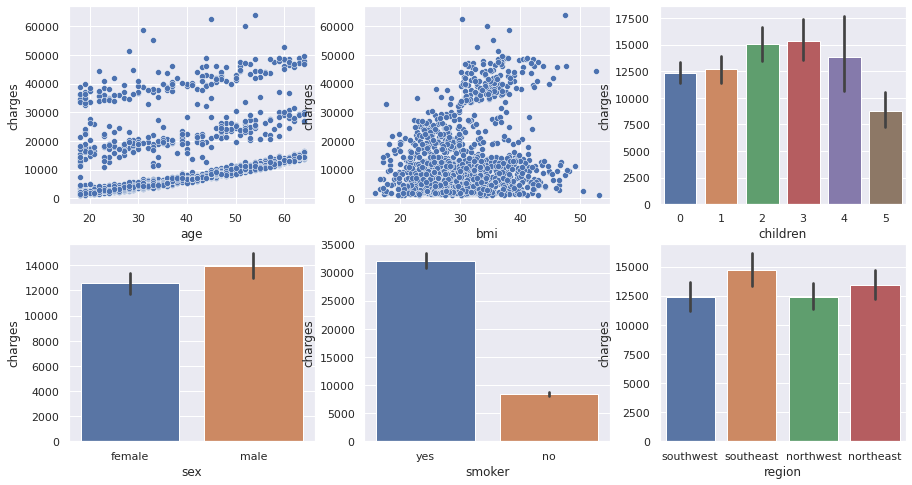

In [ ]:

fig, axs = plt.subplots(2, 3, figsize=(15,8))

sns.scatterplot(data=ins, y='charges',x='age', ax=axs[0][0])
sns.scatterplot(x = ins['bmi'],y = ins['charges'], ax=axs[0][1])
sns.barplot(x = ins['children'],y = ins['charges'], ax=axs[0][2])
sns.barplot(x = ins['sex'],y = ins['charges'] ,ax=axs[1][0])
sns.barplot(x = ins['smoker'],y = ins['charges'],ax=axs[1][1])
sns.barplot(x = ins['region'],y = ins['charges'],ax=axs[1][2])

3. ¿ Qué conclusiones puedes obtener de las graficas anteriores?

In [ ]:
# Primero podemos concluir que en su mayoria los hombres pagan un mayor costo de seguro. el costo de seguro de fumadores es mucho mayor que el de no fumadores
# La región southeast es donde el costo del seguro es mayor seguido de northeast. las familias que tienen al rededor de 3 hijos son las que tienen un mayor
# coste del seguro. en general no parece afectar tanto el coste por el bmi, ya que los datos son muy dispersos, y la mayoria de personas (sin importar su bmi)
# suelen tener un coste de seguro entre 10000 y 30000, pero si podemos notar que las personas que pasan del coste de 30000 en su mayoria tienen un bmi de 
# entre 30 y 40. En cuanto a la edad, tampoco parece haber mucha diferencia, sin embargo podemos notar 3 "lineas" principales las cuales van en aumento conforme, 
# a la edad, por lo que podemos concluir que mientras más edad, mayor es el gasto del seguro.

4. **Regresión lineal**. En su forma más simple, consiste en asumir que una variable $x$ y una variable $y$ presentan una relación lineal de la forma:

$$ y \approx \beta_0 + \beta_1 \cdot x$$

¿Cuál es el valor de beta_0 , beta_1 y el Score  para **Edad vs Costo** , **Indice de masa corporal vs Costo** , **Niños vs Costo** y otros?

In [ ]:
ec1 = LinearRegression()
ec1.fit(ins[['age']], ins['charges'])
print('Age')
print('beta_0: ', ec1.intercept_)
print('beta_1: ', ec1.coef_)
print('Score: ', ec1.score(ins[['age']], ins['charges']), '\n')

ec2 = LinearRegression()
ec2.fit(ins[['bmi']], ins['charges'])
print('BMI')
print('beta_0: ', ec2.intercept_)
print('beta_1: ', ec2.coef_)
print('Score: ', ec2.score(ins[['bmi']], ins['charges']), '\n')

ec3 = LinearRegression()
ec3.fit(ins[['children']], ins['charges'])
print('Children')
print('beta_0: ', ec3.intercept_)
print('beta_1: ', ec3.coef_)
print('Score: ', ec3.score(ins[['children']], ins['charges']), '\n')

Age
beta_0:  3165.885006063021
beta_1:  [257.72261867]
Score:  0.08940589967885804 

BMI
beta_0:  1192.9372089611497
beta_1:  [393.8730308]
Score:  0.03933913991786264 

Children
beta_0:  12522.495549644098
beta_1:  [683.08938248]
Score:  0.004623758854459203 



5. ¿Cuál de los modelos es mejor de acuerdo al score ordenalos del mejor al peor?

* Charges Age = 3165.88 + 257.72 * age
* Charges BMI = 1192.93 + 393.87 * bmi 
* Charges Children = 12522.49 + 683.08 * children



6.  **Regresión lineal múltiple**. Como ahora vamos a incluir más de una variable, el modelo se rescribe a :

$$ \hat{y} = \hat{\beta}_0 + \hat{\beta}_1 \cdot x_1 + \hat{\beta}_2 \cdot x_2 + \hat{\beta}_3\cdot x_3 + \ldots \epsilon $$

Elige  las diferentes combinaciones de variables. Ejemplo: Redes y Youtube vs Ventas 

¿Cuál es el valor de beta_0, betas_1 , beta_2 , el score y el score ajustado de de 5 combinaciones . Ejemplo: **Edad, Niños, Region vs Costo** ?

In [ ]:
ec4 = LinearRegression()
ec4.fit(newins[['age', 'children']], newins['charges'])
print('Age Children')
print('beta_0: ', ec4.intercept_)
print('betas: ', ec4.coef_)
print('Score: ', ec4.score(newins[['age', 'children']], newins['charges']), '\n')

ec5 = LinearRegression()
ec5.fit(newins[['age', 'region_num']], newins['charges'])
print('Age Region')
print('beta_0: ', ec5.intercept_)
print('betas: ', ec5.coef_)
print('Score: ', ec5.score(newins[['age', 'region_num']], newins['charges']), '\n')

ec6 = LinearRegression()
ec6.fit(newins[['region_num', 'children']], newins['charges'])
print('Age Children')
print('beta_0: ', ec6.intercept_)
print('betas: ', ec6.coef_)
print('Score: ', ec6.score(newins[['region_num','children']], newins['charges']), '\n')

Age Children
beta_0:  3157.2593937958154
betas:  [244.73468359 523.22778457]
Score:  0.09512868308812927 

Age Region
beta_0:  3175.3295212699522
betas:  [250.53296665 203.20632065]
Score:  0.09288148153268416 

Age Children
beta_0:  11216.97413804958
betas:  [229.57475753 945.44566427]
Score:  0.009058484633823083 



 7. ¿Cuál modelo es el que nos conviene elegir?

Modelo Age Children
charges = 3157.25 + 244.73 * edad + 523.22 * children

8. Conclusiones 

 matrícula- Nombre alumno : detalle

 A00571960 - Leonardo Mojica : En esta ultima actividad pude observar graficas a mayor detalle haciendo uso de las librerias de python, con estas graficas se pude observar la correlación entre los datos con el coste de los seguros, ademas de poder modelar la aproximación de la linea recta para poder llegar a un modelo aproximado para hacer predicciones. 

A00832477 - Miranda Magallanes : En esta actividad usamos todo lo visto anteriormente en actividades pasadas y lo juntamos, como las gráficas con diferentes tipos de datos y como relacionarlas y como hacerlas principalmente, Python nos ofrece muchas herramientas para el analisis de datos con comandos muy simples o que requeririan mas tiempo en otros lenguajes, es una herramienta que no habia usado antes para este tipo de situaciones pero es muy sencillo.

A00835317-Francisco González Moreno: Creo que esta actividad fue de mucha ayuda y mucho aporte ára reforzar y adquirir nuevas herramientas a la hora de porgrammar en ptyhon, como puede ser trabajar con graficos cuyo uso en la industria puede ser tan importante para visualizar datos de manera mas efectiva.
